In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
yf.pdr_override()

In [3]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

tickers = ['AXISBANK.NS','CDSL.NS','HDFCBANK.NS','PRESTIGE.NS','ITC.NS','EMAMILTD.NS','ECLERX.NS','JUBLFOOD.NS','TATASTEEL.NS','ZYDUSLIFE.NS']

In [4]:
df = pdr.get_data_yahoo(tickers, start, end)
df.head()

[*********************100%***********************]  10 of 10 completed


Adj Close                                                   \
           AXISBANK.NS     CDSL.NS    ECLERX.NS EMAMILTD.NS HDFCBANK.NS   
Date                                                                      
2018-01-01  563.940186  334.642883  1037.324585  603.927795  899.247742   
2018-01-02  557.956726  330.789917  1032.540527  592.376404  907.903198   
2018-01-03  558.904053  329.474274  1024.291748  597.666016  898.350708   
2018-01-04  558.355652  328.111633  1022.708008  600.695251  901.866272   
2018-01-05  561.696350  333.891083  1014.756226  600.378784  903.660400   

                                                                          ...  \
                ITC.NS JUBLFOOD.NS PRESTIGE.NS TATASTEEL.NS ZYDUSLIFE.NS  ...   
Date                                                                      ...   
2018-01-01  218.016327  175.342773  307.579468    27.919815   399.095337  ...   
2018-01-02  216.728027  176.897217  313.279907    28.194298   395.174042  ...   
2018-01-03  217.060501  182.641281  312.792694    28.412720   395.358582  ...   
2018-01-04  217.392975  181.476715  329.942719    29.390800   398.126556  ...   
2018-01-05  218.515045  187.951141  326.483459    29.794796   406.153687  ...   

                Volume                                                      \
           AXISBANK.NS CDSL.NS ECLERX.NS EMAMILTD.NS HDFCBANK.NS    ITC.NS   
Date                                                                         
2018-01-01     6943234  682248    108826      108444     3290258  10461011   
2018-01-02     6292268  447897     63892      209706     2388158   5688384   
2018-01-03     3990149  628390     84031      258688     2265644  11018996   
2018-01-04     2766664  462254     63891      301288     1186888   9368913   
2018-01-05     3249056  874792     81999      102240     1435434   9211954   

                                                              
           JUBLFOOD.NS PRESTIGE.NS TATASTEEL.NS ZYDUSLIFE.NS  
Date                                                          
2018-01-01     4663610       99704     19249201       803342  
2018-01-02     6492650      244625     25896915       348082  
2018-01-03    12754740      137588     27654851       472672  
2018-01-04     5925060      978071     84839667       523367  
2018-01-05    12702760      112158     74902157      1383248  

[5 rows x 60 columns]

In [5]:
df = df['Adj Close']
df.head()

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,
2018-01-01,563.940186,334.642883,1037.324585,603.927795,899.247742,218.016327,175.342773,307.579468,27.919815,399.095337
2018-01-02,557.956726,330.789917,1032.540527,592.376404,907.903198,216.728027,176.897217,313.279907,28.194298,395.174042
2018-01-03,558.904053,329.474274,1024.291748,597.666016,898.350708,217.060501,182.641281,312.792694,28.412720,395.358582
2018-01-04,558.355652,328.111633,1022.708008,600.695251,901.866272,217.392975,181.476715,329.942719,29.390800,398.126556
2018-01-05,561.696350,333.891083,1014.756226,600.378784,903.660400,218.515045,187.951141,326.483459,29.794796,406.153687


<AxesSubplot:xlabel='Date'>

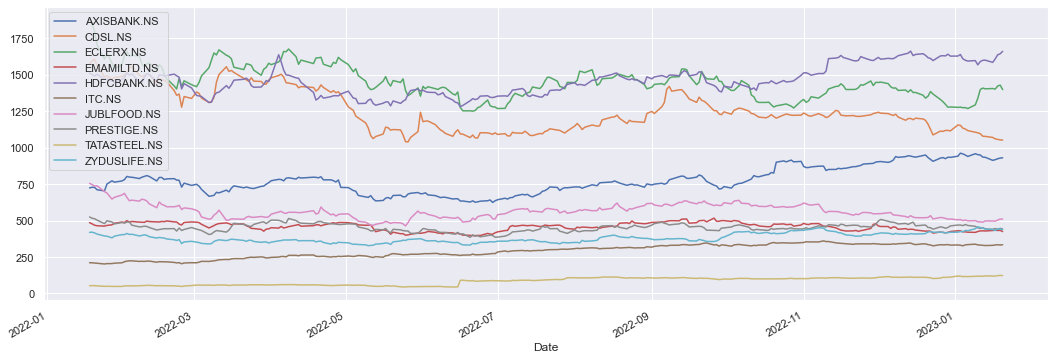

In [6]:
df.tail(252).plot(figsize=(18,6))

In [7]:
df_ret = df.pct_change().apply(lambda x: np.log(1+x)).iloc[1:,:]
df_ret.head()

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,
2018-01-02,-0.010667,-0.011580,-0.004623,-0.019312,0.009579,-0.005927,0.008826,0.018364,0.009783,-0.009874
2018-01-03,0.001696,-0.003985,-0.008021,0.008890,-0.010577,0.001533,0.031955,-0.001556,0.007717,0.000467
2018-01-04,-0.000982,-0.004144,-0.001547,0.005056,0.003906,0.001531,-0.006397,0.053378,0.033845,0.006977
2018-01-05,0.005965,0.017461,-0.007806,-0.000527,0.001987,0.005148,0.035055,-0.010540,0.013652,0.019962
2018-01-08,0.003898,-0.004231,-0.008523,0.006231,-0.001611,0.010218,0.013897,-0.007941,-0.002533,0.026453


In [8]:
#variance and covariance matrix
cov_matrix = df_ret.cov()
cov_matrix

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
AXISBANK.NS,0.000597,0.000188,0.000097,0.000127,0.000213,0.000147,0.000202,0.000209,0.000238,0.000088
CDSL.NS,0.000188,0.000524,0.000142,0.000086,0.000109,0.000106,0.000141,0.000178,0.000177,0.000094
ECLERX.NS,0.000097,0.000142,0.000717,0.000087,0.000054,0.000062,0.000111,0.000139,0.000123,0.000091
EMAMILTD.NS,0.000127,0.000086,0.000087,0.000479,0.000076,0.000075,0.000109,0.000132,0.000119,0.000103
HDFCBANK.NS,0.000213,0.000109,0.000054,0.000076,0.000284,0.000095,0.000133,0.000153,0.000143,0.000058
ITC.NS,0.000147,0.000106,0.000062,0.000075,0.000095,0.000281,0.000111,0.000118,0.000138,0.000066
JUBLFOOD.NS,0.000202,0.000141,0.000111,0.000109,0.000133,0.000111,0.000568,0.000172,0.000182,0.000140
PRESTIGE.NS,0.000209,0.000178,0.000139,0.000132,0.000153,0.000118,0.000172,0.000931,0.000205,0.000132
TATASTEEL.NS,0.000238,0.000177,0.000123,0.000119,0.000143,0.000138,0.000182,0.000205,0.001035,0.000140
ZYDUSLIFE.NS,0.000088,0.000094,0.000091,0.000103,0.000058,0.000066,0.000140,0.000132,0.000140,0.000396


In [9]:
#covariance matrix
corr_matrix = df_ret.corr()
corr_matrix

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
AXISBANK.NS,1.000000,0.336120,0.147993,0.237837,0.518223,0.360014,0.347362,0.280197,0.302759,0.180636
CDSL.NS,0.336120,1.000000,0.231000,0.171328,0.283453,0.276961,0.259180,0.254174,0.240153,0.206526
ECLERX.NS,0.147993,0.231000,1.000000,0.148635,0.119536,0.138291,0.174290,0.170222,0.142538,0.169905
EMAMILTD.NS,0.237837,0.171328,0.148635,1.000000,0.206190,0.204896,0.207917,0.197133,0.168931,0.236652
HDFCBANK.NS,0.518223,0.283453,0.119536,0.206190,1.000000,0.337190,0.331813,0.297229,0.262990,0.174260
ITC.NS,0.360014,0.276961,0.138291,0.204896,0.337190,1.000000,0.277270,0.230545,0.256235,0.196578
JUBLFOOD.NS,0.347362,0.259180,0.174290,0.207917,0.331813,0.277270,1.000000,0.236950,0.237297,0.294513
PRESTIGE.NS,0.280197,0.254174,0.170222,0.197133,0.297229,0.230545,0.236950,1.000000,0.209226,0.217120
TATASTEEL.NS,0.302759,0.240153,0.142538,0.168931,0.262990,0.256235,0.237297,0.209226,1.000000,0.218420
ZYDUSLIFE.NS,0.180636,0.206526,0.169905,0.236652,0.174260,0.196578,0.294513,0.217120,0.218420,1.000000


<AxesSubplot:title={'center':'Correlation Matrix'}>

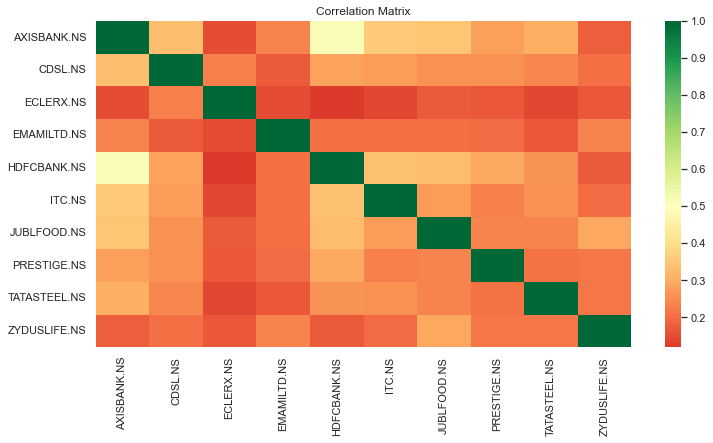

In [10]:
#heatmap of correlation matrix
plt.figure(figsize=(12,6))
plt.title('Correlation Matrix')
sns.heatmap(df_ret.corr(),cmap='RdYlGn',center=0.5)

In [11]:
weight= {}
for stock in df.columns.values:
    weight[stock] = 1/len(tickers)

In [12]:
weight

{'AXISBANK.NS': 0.1,
 'CDSL.NS': 0.1,
 'ECLERX.NS': 0.1,
 'EMAMILTD.NS': 0.1,
 'HDFCBANK.NS': 0.1,
 'ITC.NS': 0.1,
 'JUBLFOOD.NS': 0.1,
 'PRESTIGE.NS': 0.1,
 'TATASTEEL.NS': 0.1,
 'ZYDUSLIFE.NS': 0.1}

In [13]:
cov_matrix.isnull().sum()

AXISBANK.NS     0
CDSL.NS         0
ECLERX.NS       0
EMAMILTD.NS     0
HDFCBANK.NS     0
ITC.NS          0
JUBLFOOD.NS     0
PRESTIGE.NS     0
TATASTEEL.NS    0
ZYDUSLIFE.NS    0
dtype: int64

In [14]:
port_var = cov_matrix.mul(weight, axis=0).mul(weight,axis=1).sum().sum()
port_var

0.00017428531875073177

In [15]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

AXISBANK.NS     0.101834
CDSL.NS         0.592774
ECLERX.NS       0.375158
EMAMILTD.NS     0.047352
HDFCBANK.NS     0.101261
ITC.NS          0.096735
JUBLFOOD.NS     0.203996
PRESTIGE.NS     0.212978
TATASTEEL.NS    0.493096
ZYDUSLIFE.NS    0.119004
dtype: float64

In [16]:
def ind_ewma(data,span):
    ind_ret = pd.DataFrame()
    for i in range(len(tickers)):
        returns = data.iloc[:,i]
        ewma = returns.ewm(span=span,adjust=False).mean().iloc[-1]*(252/span)
        ind_ret.loc[data.columns.values[i],'Returns'] = ewma
    return ind_ret

In [17]:
ind_ewma_ret = ind_ewma(df_ret,14)
ind_ewma_ret

,Returns
AXISBANK.NS,-0.006084
CDSL.NS,-0.084229
ECLERX.NS,0.044180
EMAMILTD.NS,-0.026365
HDFCBANK.NS,0.070673
ITC.NS,0.014475
JUBLFOOD.NS,0.035896
PRESTIGE.NS,-0.044815
TATASTEEL.NS,0.088722
ZYDUSLIFE.NS,0.007367


In [18]:
weight = [(1/len(tickers)) for i in range(len(tickers))]
port_er = (ind_er*weight).sum()
port_er

0.2344186179224342

In [19]:
from arch import arch_model
# Specify a list of possible GARCH models
def Garch(data):
    ann_sd = pd.DataFrame()
    for i in range(len(data.columns.values)):
        returns = data.iloc[:,i]
        models = [arch_model(returns, mean='Constant', vol='GARCH', p=1, q=1),
                  arch_model(returns, mean='Constant', vol='GARCH', p=1, q=2),
                  arch_model(returns, mean='Constant', vol='GARCH', p=2, q=1),
                 arch_model(returns, mean='Constant', vol='GARCH', p=2, q=2),
                 arch_model(returns, mean='Constant', vol='GARCH', p=3, q=1),
                 arch_model(returns, mean='Constant', vol='GARCH', p=3, q=2),
                 arch_model(returns, mean='Constant', vol='GARCH', p=3, q=3)]
        best_model = None
        best_aic = float('inf')
        best_bic = float('inf')
        for model in models:
            results = model.fit(disp='off')
            if results.aic < best_aic:
                best_model = model
                best_aic = results.aic
                best_bic = results.bic
        print(f' {data.columns.values[i]}: {best_model.volatility}')
        ann_sd.loc[df_ret.columns.values[i],'Volatilty'] = np.sqrt(results.forecast(horizon=1).variance.iloc[-1,0])
    ann_sd = ann_sd.apply(lambda x: x*np.sqrt(250))
    return ann_sd

In [20]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd_basic = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd_basic

AXISBANK.NS     0.386169
CDSL.NS         0.361945
ECLERX.NS       0.423407
EMAMILTD.NS     0.346217
HDFCBANK.NS     0.266405
ITC.NS          0.264823
JUBLFOOD.NS     0.376966
PRESTIGE.NS     0.482442
TATASTEEL.NS    0.508724
ZYDUSLIFE.NS    0.314655
dtype: float64

In [21]:
ann_sd_garch = Garch(df_ret)

 AXISBANK.NS: GARCH(p: 3, q: 1)
 CDSL.NS: GARCH(p: 3, q: 3)
 ECLERX.NS: GARCH(p: 1, q: 2)
 EMAMILTD.NS: GARCH(p: 1, q: 2)
 HDFCBANK.NS: GARCH(p: 1, q: 1)
 ITC.NS: GARCH(p: 3, q: 1)
 JUBLFOOD.NS: GARCH(p: 2, q: 1)
 PRESTIGE.NS: GARCH(p: 1, q: 2)
 TATASTEEL.NS: GARCH(p: 3, q: 1)
 ZYDUSLIFE.NS: GARCH(p: 1, q: 1)


In [22]:
ann_sd_garch

,Volatilty
AXISBANK.NS,0.261836
CDSL.NS,0.241821
ECLERX.NS,0.310063
EMAMILTD.NS,0.284700
HDFCBANK.NS,0.209526
ITC.NS,0.183820
JUBLFOOD.NS,0.311358
PRESTIGE.NS,0.309389
TATASTEEL.NS,0.345895
ZYDUSLIFE.NS,0.279376


In [23]:
assets = pd.concat([ind_ewma_ret, ann_sd_garch], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AXISBANK.NS,-0.006084,0.261836
CDSL.NS,-0.084229,0.241821
ECLERX.NS,0.044180,0.310063
EMAMILTD.NS,-0.026365,0.284700
HDFCBANK.NS,0.070673,0.209526
ITC.NS,0.014475,0.183820
JUBLFOOD.NS,0.035896,0.311358
PRESTIGE.NS,-0.044815,0.309389
TATASTEEL.NS,0.088722,0.345895
ZYDUSLIFE.NS,0.007367,0.279376


In [24]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [25]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = np.square(ann_sd_garch).mul(np.square(weights),axis=0).sum().sum()
    sd = np.sqrt(var)# Portfolio Variance # Daily standard deviation
    p_vol.append(sd)

In [26]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [27]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,AXISBANK.NS weight,CDSL.NS weight,ECLERX.NS weight,EMAMILTD.NS weight,HDFCBANK.NS weight,ITC.NS weight,JUBLFOOD.NS weight,PRESTIGE.NS weight,TATASTEEL.NS weight,ZYDUSLIFE.NS weight
0,0.239482,0.101829,0.004294,0.140803,0.093911,0.099301,0.169294,0.116768,0.218405,0.103540,0.037997,0.015687
1,0.227534,0.104852,0.098691,0.131690,0.090375,0.219741,0.030061,0.046986,0.131962,0.008918,0.080075,0.161502
2,0.238359,0.115778,0.106522,0.017460,0.043783,0.045018,0.049291,0.166821,0.183476,0.042105,0.240478,0.105045
3,0.270732,0.107415,0.114322,0.126159,0.061810,0.073700,0.042987,0.034831,0.048657,0.205958,0.164177,0.127400
4,0.316124,0.113115,0.056832,0.197306,0.075693,0.118267,0.035805,0.059933,0.186791,0.062833,0.197526,0.009014


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

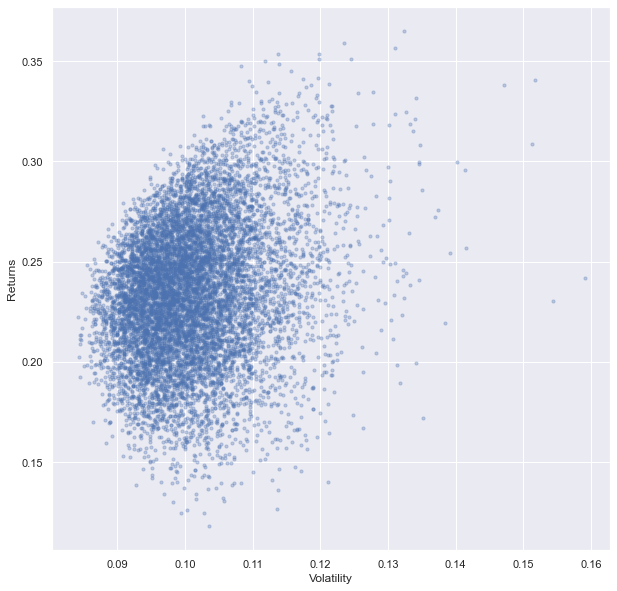

In [28]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [29]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                0.222163
Volatility             0.084165
AXISBANK.NS weight     0.131619
CDSL.NS weight         0.109308
ECLERX.NS weight       0.105541
EMAMILTD.NS weight     0.074188
HDFCBANK.NS weight     0.152149
ITC.NS weight          0.152990
JUBLFOOD.NS weight     0.064171
PRESTIGE.NS weight     0.083290
TATASTEEL.NS weight    0.066130
ZYDUSLIFE.NS weight    0.060614
Name: 6131, dtype: float64

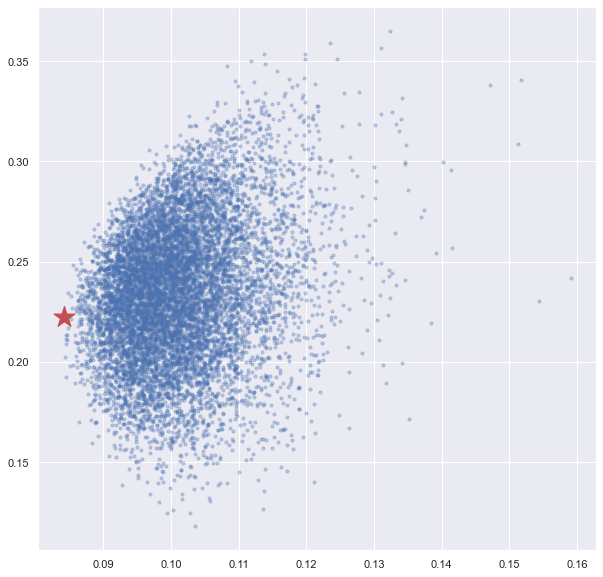

In [30]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)


In [31]:
# Finding the optimal portfolio
rf = 0.05 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                0.347556
Volatility             0.108261
AXISBANK.NS weight     0.070350
CDSL.NS weight         0.253170
ECLERX.NS weight       0.147181
EMAMILTD.NS weight     0.036261
HDFCBANK.NS weight     0.064677
ITC.NS weight          0.102195
JUBLFOOD.NS weight     0.027822
PRESTIGE.NS weight     0.109920
TATASTEEL.NS weight    0.174937
ZYDUSLIFE.NS weight    0.013488
Name: 9687, dtype: float64

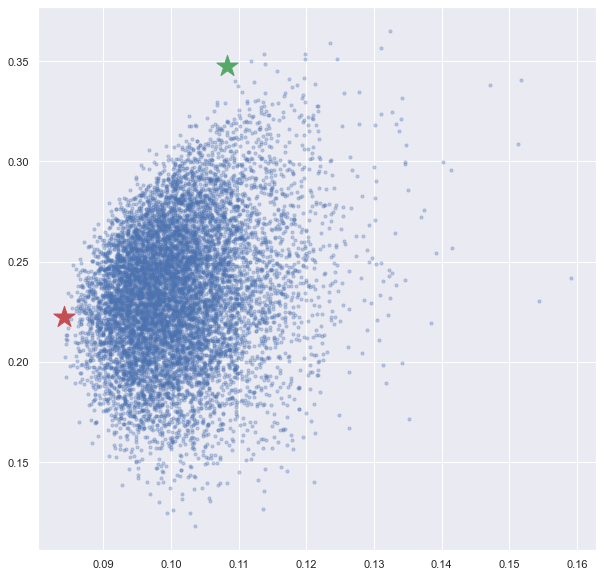

In [32]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## Market Risk  Estimation for Optimal Portfolio

In [33]:
optim_portfolio = optimal_risky_port.iloc[2:]
optim_portfolio = optim_portfolio.reset_index()
optim_portfolio.columns = ['asset','weight']
optim_portfolio['asset'] = optim_portfolio['asset'].str.replace('weight','')
optim_portfolio

,asset,weight
0,AXISBANK.NS,0.070350
1,CDSL.NS,0.253170
2,ECLERX.NS,0.147181
3,EMAMILTD.NS,0.036261
4,HDFCBANK.NS,0.064677
5,ITC.NS,0.102195
6,JUBLFOOD.NS,0.027822
7,PRESTIGE.NS,0.109920
8,TATASTEEL.NS,0.174937
9,ZYDUSLIFE.NS,0.013488


In [34]:
corr_matrix

,AXISBANK.NS,CDSL.NS,ECLERX.NS,EMAMILTD.NS,HDFCBANK.NS,ITC.NS,JUBLFOOD.NS,PRESTIGE.NS,TATASTEEL.NS,ZYDUSLIFE.NS
AXISBANK.NS,1.000000,0.336120,0.147993,0.237837,0.518223,0.360014,0.347362,0.280197,0.302759,0.180636
CDSL.NS,0.336120,1.000000,0.231000,0.171328,0.283453,0.276961,0.259180,0.254174,0.240153,0.206526
ECLERX.NS,0.147993,0.231000,1.000000,0.148635,0.119536,0.138291,0.174290,0.170222,0.142538,0.169905
EMAMILTD.NS,0.237837,0.171328,0.148635,1.000000,0.206190,0.204896,0.207917,0.197133,0.168931,0.236652
HDFCBANK.NS,0.518223,0.283453,0.119536,0.206190,1.000000,0.337190,0.331813,0.297229,0.262990,0.174260
ITC.NS,0.360014,0.276961,0.138291,0.204896,0.337190,1.000000,0.277270,0.230545,0.256235,0.196578
JUBLFOOD.NS,0.347362,0.259180,0.174290,0.207917,0.331813,0.277270,1.000000,0.236950,0.237297,0.294513
PRESTIGE.NS,0.280197,0.254174,0.170222,0.197133,0.297229,0.230545,0.236950,1.000000,0.209226,0.217120
TATASTEEL.NS,0.302759,0.240153,0.142538,0.168931,0.262990,0.256235,0.237297,0.209226,1.000000,0.218420
ZYDUSLIFE.NS,0.180636,0.206526,0.169905,0.236652,0.174260,0.196578,0.294513,0.217120,0.218420,1.000000


In [ ]:
from copulas.multivariate import GaussianMultivariate

In [ ]:
copula = GaussianMultivariate(corr_matrix)

In [ ]:
# Simulating the portfolio returns
num_simulations = 10000
portfolio_returns = np.zeros(num_simulations)
for i in range(num_simulations):
    simulated_returns = copula.simulate(num_simulations).T
    portfolio_returns[i] = (optim_portfolio['weight'] * simulated_returns).sum()

In [ ]:
pip install copulae

In [35]:
from copulae import NormalCopula

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [38]:
pip install --upgrade numpy

     ---------------------------------------- 14.9/14.9 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
yfinance 0.1.74 requires requests>=2.26, but you have requests 2.13.0 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
pandas-datareader 0.10.0 requires requests>=2.19.0, but you have requests 2.13.0 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.1 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
pip show copulalib

Name: copulalib
Version: 2.0.1
Summary: A library for the copula
Home-page: 
Author: 
Author-email: Sat Kumar Tomer <satkumartomer@gmail.com>
License: 
Location: d:\users\imhj1\anaconda3\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install numpy==<2.0.1

Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [48]:
pip install --upgrade copulalib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [50]:
import copulae

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [51]:
pip show copulae

Name: copulae
Version: 0.7.7
Summary: Python copulae library for dependency modelling
Home-page: 
Author: Daniel Bok
Author-email: daniel.bok@outlook.com
License: MIT
Location: d:\users\imhj1\anaconda3\lib\site-packages
Requires: numpy, pandas, scikit-learn, scipy, statsmodels, wheel, wrapt
Note: you may need to restart the kernel to use updated packages.
Required-by: 


In [3]:
pip install numpy==1.19.2

  Using cached numpy-1.19.2.zip (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [200 lines of output]
  Running from numpy source directory.
  setup.py:470: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
    run_build = parse_setuppy_commands()
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['D:\\Users\\imhj1\\anaco

In [4]:
pip show numpy

Name: numpy
Version: 1.24.1
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: d:\users\imhj1\anaconda3\lib\site-packages
Requires: 
Required-by: arch, astropy, bkcharts, bokeh, Bottleneck, copulae, copulas, daal4py, datashader, datashape, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, matplotlib, mkl-fft, mkl-random, numba, numexpr, pandas, patsy, pyerfa, PyWavelets, researchpy, scikit-image, scikit-learn, scipy, seaborn, statsmodels, tables, tifffile, xarray, xgboost, yfinance
Note: you may need to restart the kernel to use updated packages.


In [60]:
pip uninstall numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
conda list

# packages in environment at D:\Users\imhj1\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
aiohttp                   3.8.1            py39h2bbff1b_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2022.05                  py39_0  
anaconda-client           1.9.0            py39haa95532_0  
anaconda-navigator        2.1.4            py39haa95532_0  
anaconda-project          0.10.2             pyhd3eb1b0_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
arch                      5.3.1                    pypi_0    pypi
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow                     1.2.2              pyhd3eb1b0_0  
astroid                   2.6.


terminado                 0.13.1           py39haa95532_0  
testpath                  0.5.0              pyhd3eb1b0_0  
text-unidecode            1.3                pyhd3eb1b0_0  
textdistance              4.2.1              pyhd3eb1b0_0  
threadpoolctl             2.2.0              pyh0d69192_0  
three-merge               0.1.1              pyhd3eb1b0_0  
tifffile                  2021.7.2           pyhd3eb1b0_2  
tinycss                   0.4             pyhd3eb1b0_1002  
tk                        8.6.11               h2bbff1b_0  
tldextract                3.2.0              pyhd3eb1b0_0  
toml                      0.10.2             pyhd3eb1b0_0  
tomli                     1.2.2              pyhd3eb1b0_0  
toolz                     0.11.2             pyhd3eb1b0_0  
tornado                   6.1              py39h2bbff1b_0  
tqdm                      4.64.0           py39haa95532_0  
traitlets                 5.1.1              pyhd3eb1b0_0  
twisted                   22.2.0       